In [2]:
import os
import numpy as np

import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt


import IPython.display as ipd
audio_path = '8230-279154-0003.flac'
ipd.Audio(audio_path)

In [31]:
signal, sample_rate =  librosa.load(audio_path)
duration = librosa.get_duration(y=signal, sr=sample_rate)
time = np.arange(0, duration, 1/sample_rate) 

signal.shape, sample_rate, duration*sample_rate # duration*sample_rate = signal

((70450,), 22050, 70450.0)

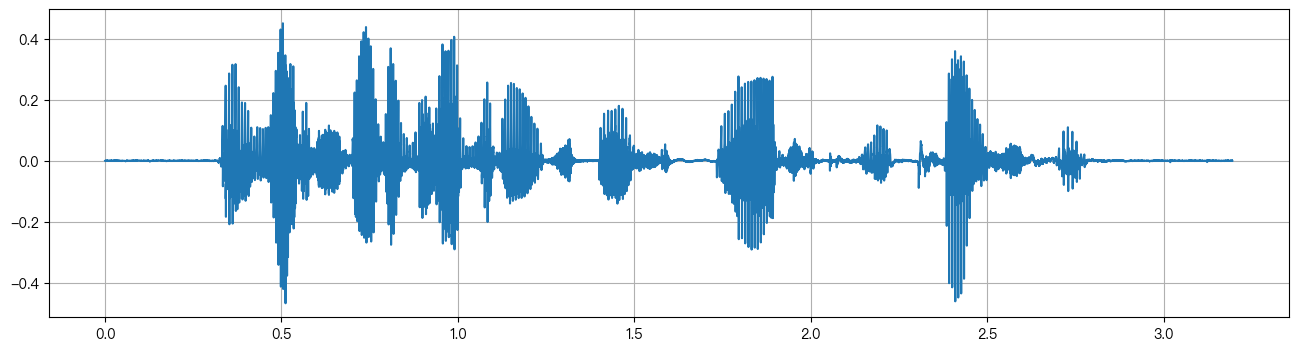

In [32]:
# Visualize the signal in raw wav form
plt.figure(figsize=(16,4))
plt.plot(time, signal)
plt.grid()
plt.show()

这张波形图表示的是音频信号（And what sort of evidence is logically possible）的时间域表示。在这个图中，横轴表示时间（秒），纵轴表示声音信号的振幅。每个点表示在特定时间点音频信号的振幅值。音频信号是由连续的声波转换成的数字信号，这个转换过程叫做模拟-数字转换。在这个过程中，声波的振幅在不同的时间点被采样，即记录下了在这些时间点声波的振幅。

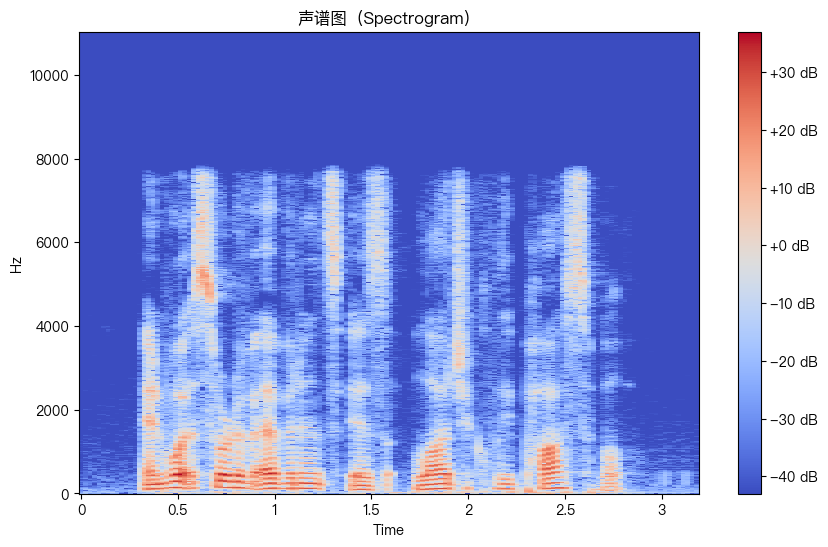

In [35]:
import matplotlib.pyplot as plt
import librosa.display

# 计算STFT
D = librosa.stft(signal)

# 将STFT幅度转换为分贝单位
D_db = librosa.amplitude_to_db(abs(D))

# 显示频谱图
plt.figure(figsize=(10, 6))
librosa.display.specshow(D_db, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('声谱图（Spectrogram）')
plt.show()

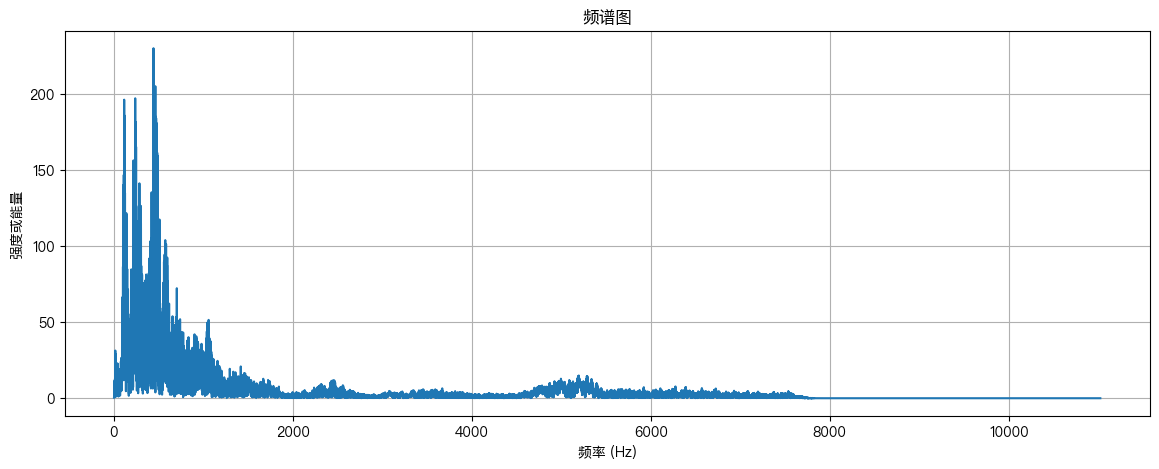

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# FFT 转换
fft_spectrum = np.fft.fft(signal)
# FFT 频谱的幅度
spectrum_magnitude = np.abs(fft_spectrum)
# FFT 频谱的频率
frequency = np.fft.fftfreq(len(spectrum_magnitude), 1 / sample_rate)

# 由于FFT结果是对称的，我们只取一半区间
half_len = len(spectrum_magnitude) // 2
frequency = frequency[:half_len]
spectrum_magnitude = spectrum_magnitude[:half_len]

# 绘制频谱图
plt.figure(figsize=(14, 5))
plt.plot(frequency, spectrum_magnitude)
plt.title('频谱图')
plt.xlabel('频率 (Hz)')
plt.ylabel('强度或能量')
plt.grid(True)
plt.show()


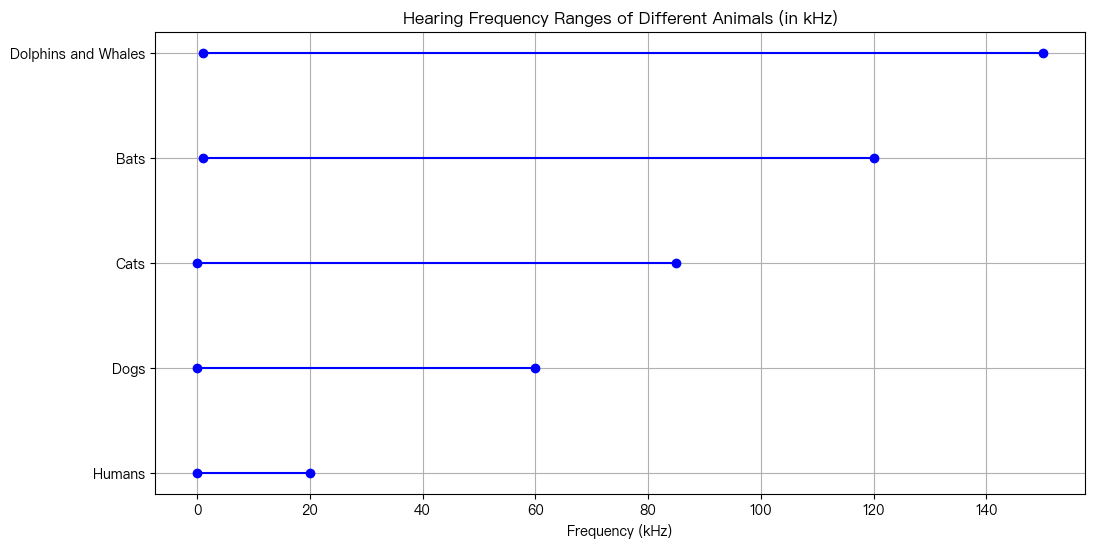

In [33]:
import matplotlib.pyplot as plt

# 动物及其能听到的声音频率范围（单位：kHz）
animals = ["Humans", "Dogs", "Cats", "Bats", "Dolphins and Whales"]
frequency_ranges = [(0.02, 20), (0.04, 60), (0.048, 85), (1, 120), (1, 150)]

# 创建一个条形图来展示这些信息
plt.figure(figsize=(12, 6))

# 对于每种动物，绘制它们的听力范围
for i, (animal, freq_range) in enumerate(zip(animals, frequency_ranges)):
    plt.plot([freq_range[0], freq_range[1]], [i, i], color="blue", marker="o")

# 设置图表的标题和标签
plt.title("Hearing Frequency Ranges of Different Animals (in kHz)")
plt.yticks(range(len(animals)), animals)
plt.xlabel("Frequency (kHz)")

# 显示图表
plt.grid(True)
plt.show()


In [37]:
# If you're interested in the detailed steps of extracting mfccs, please refer to the https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sample_rate)
mfccs.shape

(13, 138)

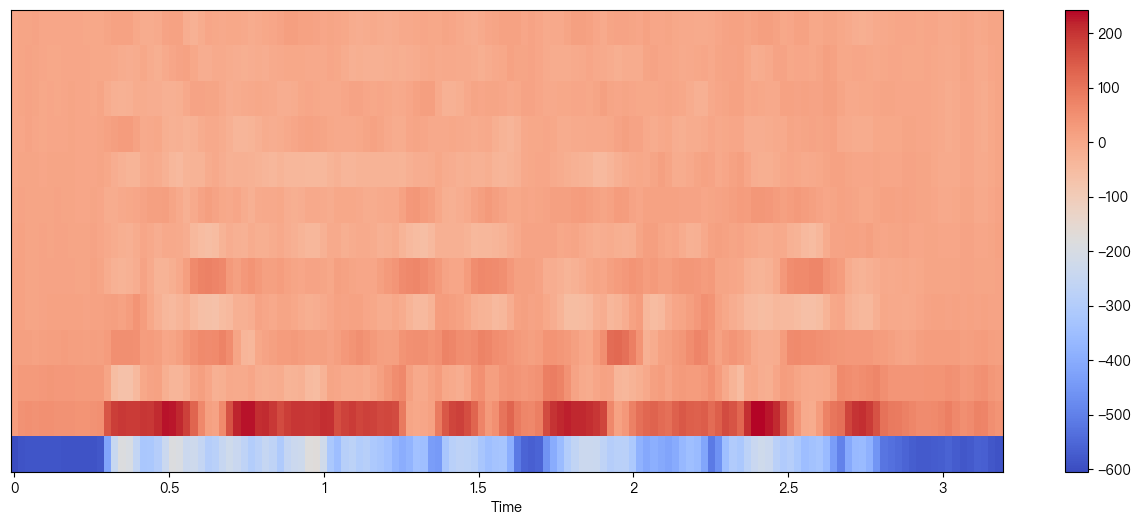

In [38]:
# Visuzlize MFCCs
plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs, x_axis="time", sr=sample_rate) # x_axis: time of audio & y_axis: 13 mfcc coefficients
plt.colorbar()
plt.show()

In [39]:
delta_1 = librosa.feature.delta(mfccs)
delta_2 = librosa.feature.delta(mfccs, order=2)

In [40]:
delta_1.shape, delta_2.shape

((13, 138), (13, 138))

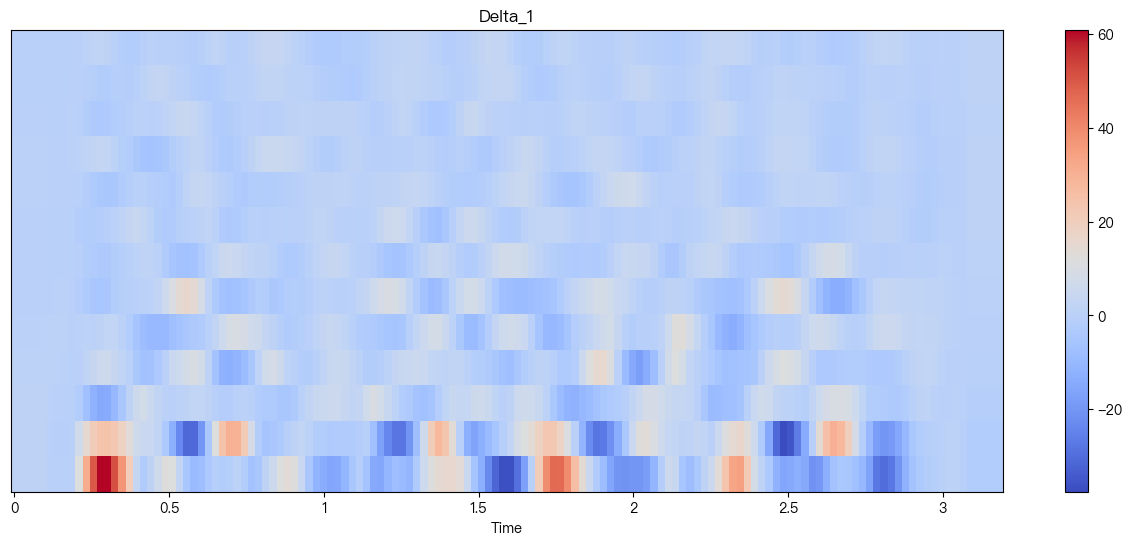

In [41]:
plt.figure(figsize=(16,6))
librosa.display.specshow(delta_1, x_axis="time", sr=sample_rate)
plt.colorbar()
plt.title("Delta_1")
plt.show()

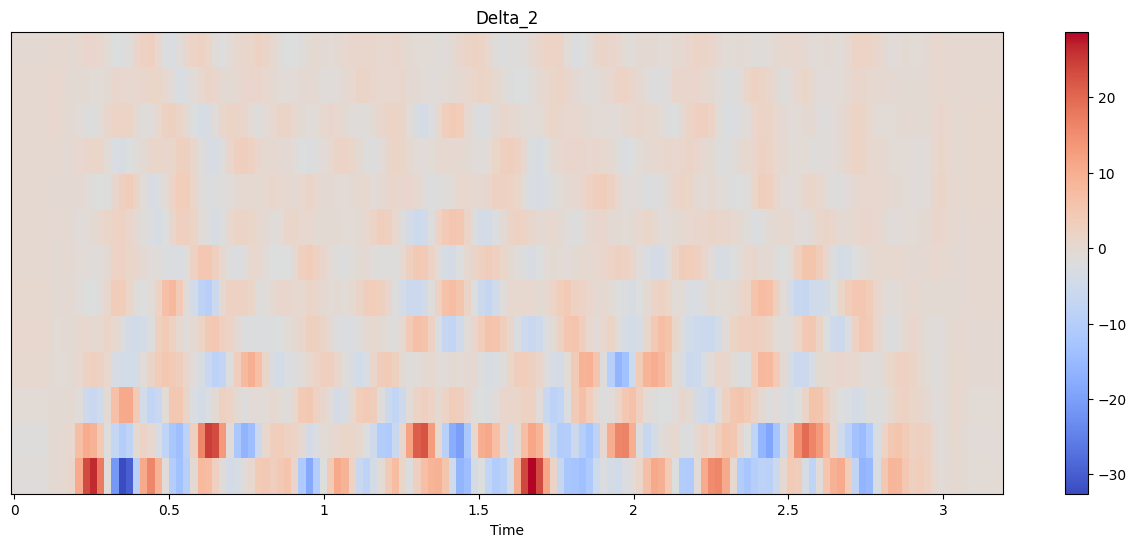

In [22]:
plt.figure(figsize=(16,6))
librosa.display.specshow(delta_2, x_axis="time", sr=sample_rate)
plt.colorbar()
plt.title("Delta_2")
plt.show()

In [23]:
mfccs_final = np.concatenate((mfccs, delta_1, delta_2))

In [24]:
mfccs_final.shape # 13*3 = 39

(39, 138)

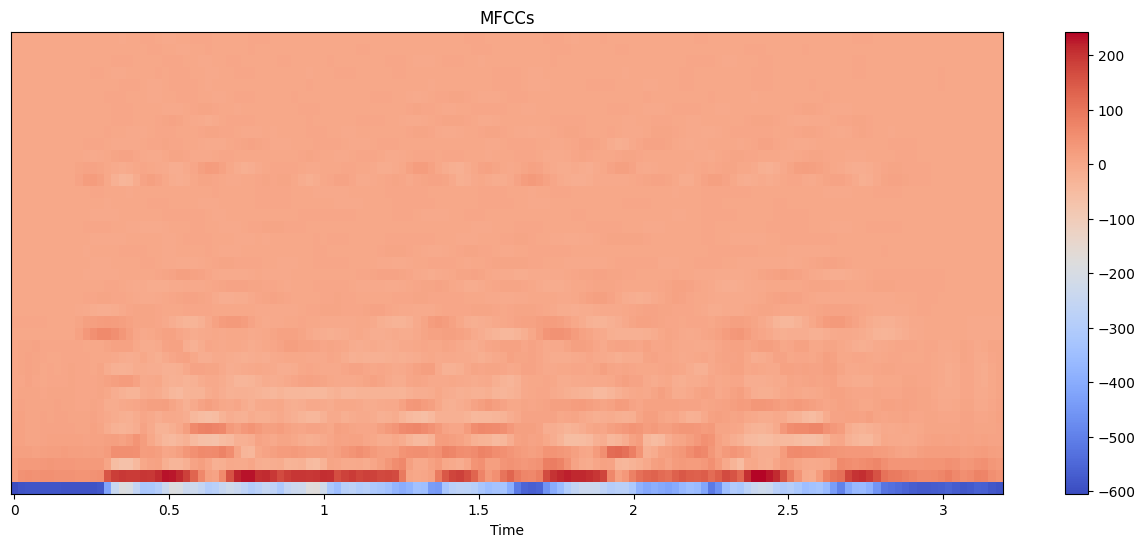

In [25]:
plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs_final, x_axis="time", sr=sample_rate)
plt.colorbar()
plt.title("MFCCs")
plt.show()

In [26]:
mfccs_final -= (np.mean(mfccs_final, axis=0) + 1e-8)

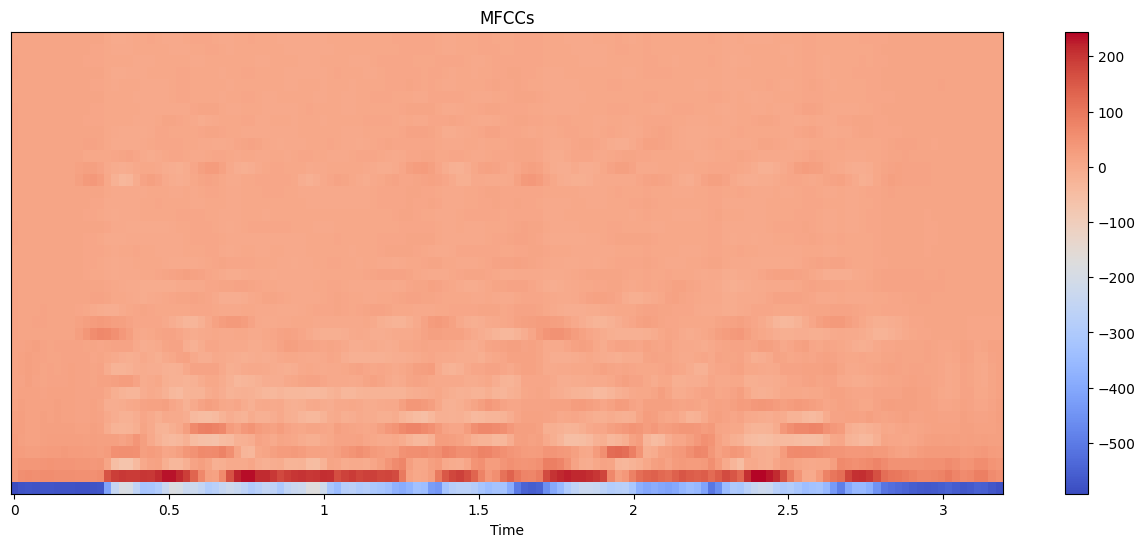

In [27]:
plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs_final, x_axis="time", sr=sample_rate)
plt.colorbar()
plt.title("MFCCs")
plt.show()